In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pickle
%matplotlib inline

In [3]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


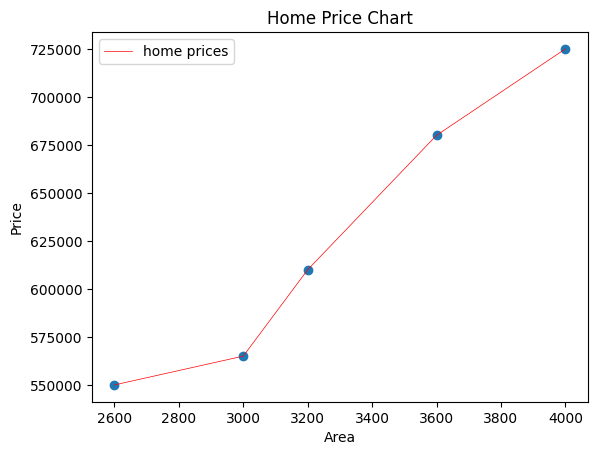

In [3]:
plt.scatter(df.area, df.price)
plt.plot(df.area, df.price, color='red', linewidth=0.5, label='home prices' )
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Home Price Chart')
plt.legend()

In [4]:
X_train = df.drop(['price'], axis='columns')
X_train

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [5]:
y_train = df.price
y_train

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
pred = model.predict(pd.DataFrame({'area':[2600, 3000]})) 
pred

array([533664.38356164, 587979.45205479])

In [8]:
model.coef_

array([135.78767123])

In [9]:
model.intercept_

np.float64(180616.43835616432)

In [10]:
model.coef_*2600+model.intercept_

array([533664.38356164])

In [11]:
X_test = pd.read_csv('areas.csv')
X_test

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [12]:
pred = model.predict(X_test)
pred

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [13]:
with open('../saved_models/model_home_price_predection', 'wb') as f:
    pickle.dump(model, f)